<a href="https://colab.research.google.com/github/Subhamoypanja/Heart-Disease-Diagnostic-Analysis-Project/blob/main/2_Project_10_Heart_Disease_Diagnostic_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Data Analyst Project On Heart Disease Diagonstic Analysis** by Subhamoy Panja

---


#**Problem Statement:**
Health is real wealth in the pandemic time we all realized the brute effects of covid-19 on all
irrespective of any status. You are required to analyze this health and medical data for better
future preparation.

Do ETL: Extract- Transform and Load data from the heart disease diagnostic database
You can perform EDA through python. The database extracts various information such as
Heart disease rates, Heart disease by gender, by age.

#**Now let's start with Importing some necessary Python libraries**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#**Loading Dataset**

In [ ]:
Data = pd.read_csv("https://raw.githubusercontent.com/Subhamoypanja/Heart-Disease-Diagnostic-Analysis-Project/main/Dataset/Heart%20Disease%20data.csv")

In [ ]:
Data.head(10)        # Data_Frame

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


Here we can see in the "sex" column, 1 = male and 0 = female.

In "fbs" column if fasting blood sugar >120 mg/dl then 1 = true and 0 = false.

In "exang" column,exercise induced angina (1 = yes; 0 = no)

thalach: The person's maximum heart rate achieved

#**The columns name**

In [ ]:
Data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

#**Dataset_details**

In [ ]:
# Read Text Files with Pandas using read_fwf()
Dataset_details = pd.read_fwf("https://raw.githubusercontent.com/Subhamoypanja/Heart-Disease-Diagnostic-Analysis-Project/main/Dataset/Dataset%20Details.txt")
print(Dataset_details)

                               Attribute Information:
0                                                 age
1                                                 sex
2                          chest pain type (4 values)
3                              resting blood pressure
4                          serum cholestoral in mg/dl
5                     fasting blood sugar > 120 mg/dl
6   resting electrocardiographic results (values 0...
7                         maximum heart rate achieved
8                             exercise induced angina
9   oldpeak = ST depression induced by exercise re...
10          the slope of the peak exercise ST segment
11  number of major vessels (0-3) colored by flour...
12  thal: 0 = normal; 1 = fixed defect; 2 = revers...


#**Checking the shape of the data**

In [ ]:
Data.shape

(1025, 14)

#**Information about type of the data**

In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
Data.describe()              # descriptive statistics

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
#Checking NULL Values

Data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

**There is NO MISSING Values in our Dataset**

#**Analysing the 'target' variable :**

In [ ]:
Data["target"].describe()

count    1025.000000
mean        0.513171
std         0.500070
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: target, dtype: float64

In [ ]:
Data["target"].unique()

array([0, 1])

Clearly, this is a classification problem, with the target variable having values '0' and '1'. Here '0' means patient without heart problems and '1' means patient with heart problems.

#**Data Transformation**

In [ ]:
new_Data = Data.copy()    # Copy the dataset to new_Data
new_Data.replace({'sex':{1:'Male',0:'Female'}}, inplace=True)
new_Data.replace({'target':{0:'Absence',1:'Presence'}}, inplace=True)

In [ ]:
new_Data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,Male,0,125,212,0,1,168,0,1.0,2,2,3,Absence
1,53,Male,0,140,203,1,0,155,1,3.1,0,0,3,Absence
2,70,Male,0,145,174,0,1,125,1,2.6,0,0,3,Absence
3,61,Male,0,148,203,0,1,161,0,0.0,2,1,3,Absence
4,62,Female,0,138,294,1,1,106,0,1.9,1,3,2,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,Male,1,140,221,0,1,164,1,0.0,2,0,2,Presence
1021,60,Male,0,125,258,0,0,141,1,2.8,1,1,3,Absence
1022,47,Male,0,110,275,0,0,118,1,1.0,1,1,2,Absence
1023,50,Female,0,110,254,0,0,159,0,0.0,2,0,2,Presence


We have used **'Male'** and **'Female'** instead of 1 and 0 for "sex" column,  **'Absence'** and **'Presence'** instead of 0 and 1 for "target" column.

#**Exploratory Data Analysis (EDA):**

##**First, analysing the target variable**

target
Presence    526
Absence     499
Name: count, dtype: int64

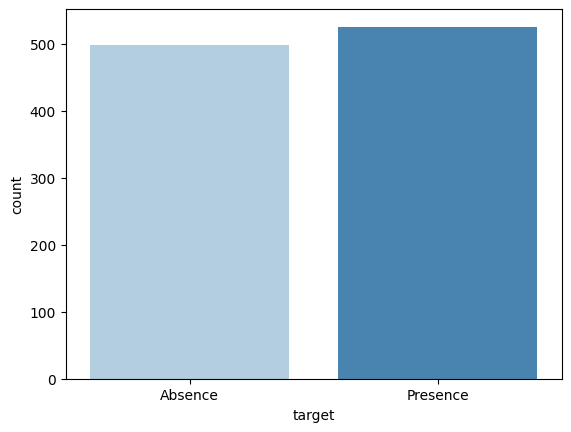

In [ ]:
sns.countplot(x=new_Data["target"],hue=new_Data["target"],legend=False,palette="Blues")
target_values = new_Data.target.value_counts()
target_values

Here from the dataset we can see in the 'target' column, we have **526** patient with heart disease and **499** patient without heart disease problems.

##**Heart disease rates**

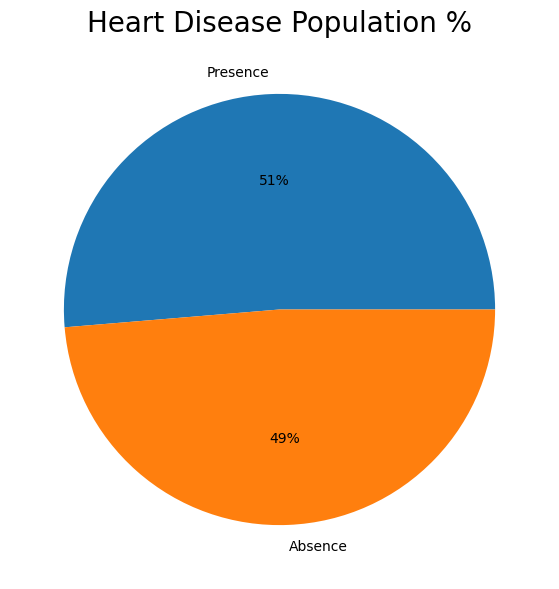

In [ ]:
#Pie Chart Creation of Heart Disease Population % using MatplotLib

plt.figure(figsize=(10,7)) # defining  canvas size
plt.pie(target_values, labels=['Presence','Absence'], autopct='%0.0f%%')
plt.title('Heart Disease Population %', fontsize=20)
plt.show()

From the overall population, people having heart disease (51%) are greater than those who have not heart disease(49%).
In this dataset 51% people having heart disease('Presence') and 49% people having no heart disease('Absence').

##**Analysing Heart disease by gender**

**Genderwise Distribuition :**

sex
Male      713
Female    312
Name: count, dtype: int64

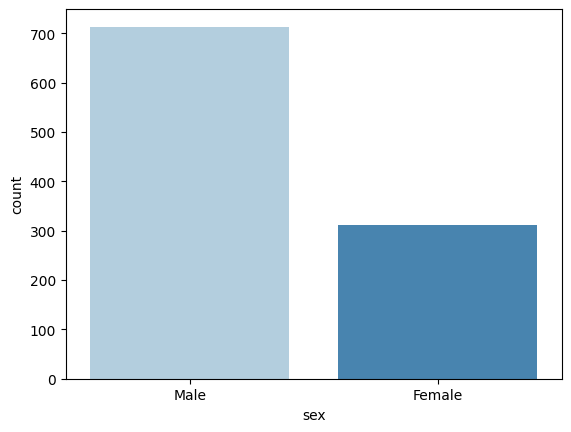

In [ ]:
sns.countplot(x=new_Data["sex"],hue=new_Data["sex"],legend=False,palette="Blues")
age_values = new_Data.sex.value_counts()
age_values

Here we can see that Male patient having 713 and Female patient having 312.

**Heart Disease based on gender :**

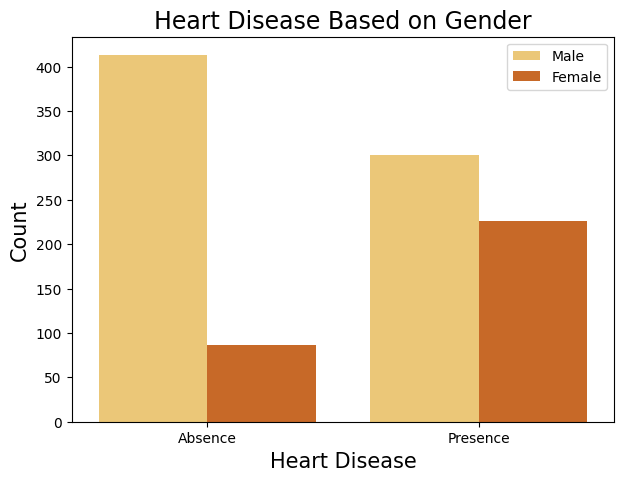

In [ ]:
#Count Plot Creation of Heart Disease Based on Gender using MatplotLib and Seaborn library

plt.figure(figsize=(7,5))
sns.countplot(x=new_Data["target"], hue=new_Data["sex"], data=new_Data, palette='YlOrBr')
plt.xlabel('Heart Disease', fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.legend(labels=['Male','Female'])
plt.title('Heart Disease Based on Gender',fontsize=17)
plt.show()

Based on this plot we can say Male patient has more chance of heart disease than female. Because Heart Disease presence in Male patient more that Female patient.

##**Analysing Heart Disease by Age**

**Age_wise Distribuition :**

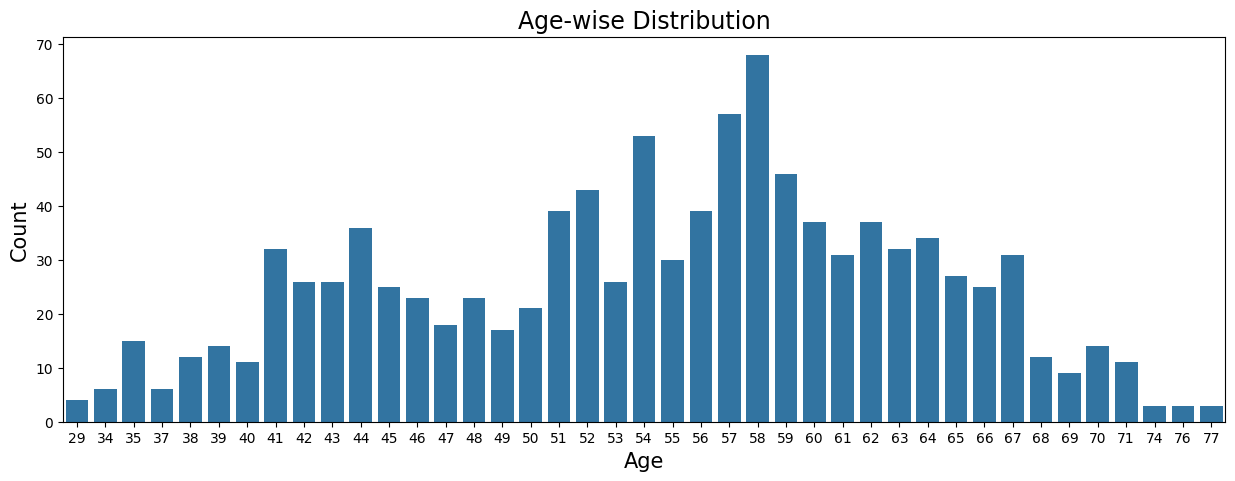

In [ ]:
#Countplot Creation of Distribution of Age using MatplotLib and Seaborn

plt.figure(figsize=(15,5))
sns.countplot(x='age', data=new_Data)
plt.title('Age-wise Distribution', fontsize=17)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

Age between 40-70 patient is more than other ages.

**Heart Disease based on age :**

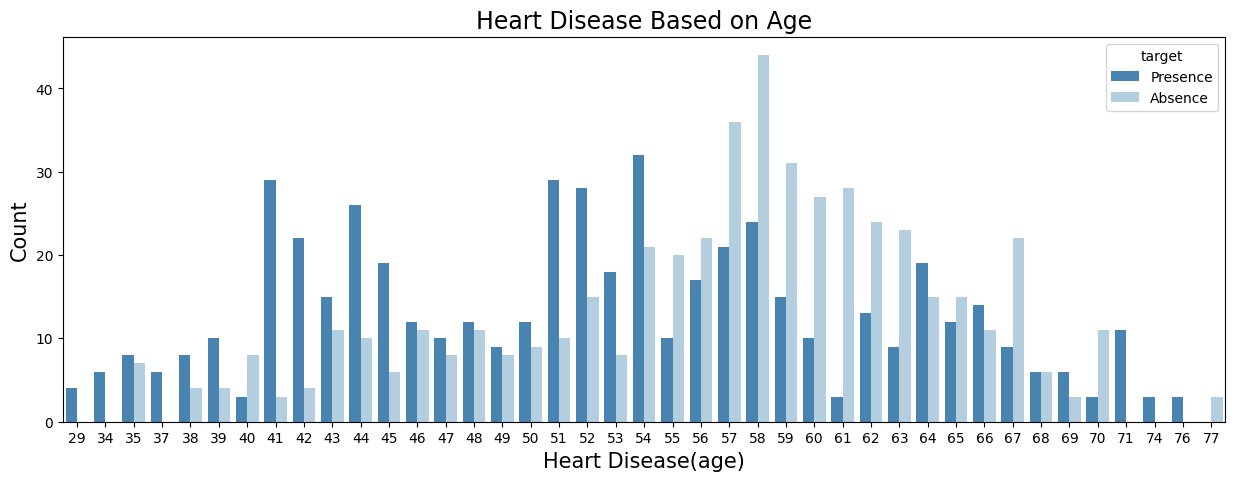

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(x=new_Data["age"], hue=new_Data["target"], data=new_Data, palette='Blues_r')
plt.xlabel('Heart Disease(age)', fontsize=15)
plt.ylabel('Count',fontsize=15)
# plt.legend(labels=['Presence','Absence'])
plt.title('Heart Disease Based on Age',fontsize=17)
plt.show()

IMAPCT OF AGE TO HEART DISEASE:

At the age range between 41 to 60 chance of heart disease is very high and others are 50-50 percent.
If age is less than 30 their is less chance of heart disease.

#**Analysing Heart Disease based on cp(chest pain)**

In [ ]:
new_Data["cp"].unique()

array([0, 1, 2, 3])

So, chest pain have 4 type value like 0,1,2,3

In [ ]:
new_Data["cp"].value_counts() # counting the value of cp column

cp
0    497
2    284
1    167
3     77
Name: count, dtype: int64

Type-0 chest pain is more common in patients and after that, Type-2 comes in second number.

**Heart Disease based on chest pain :**

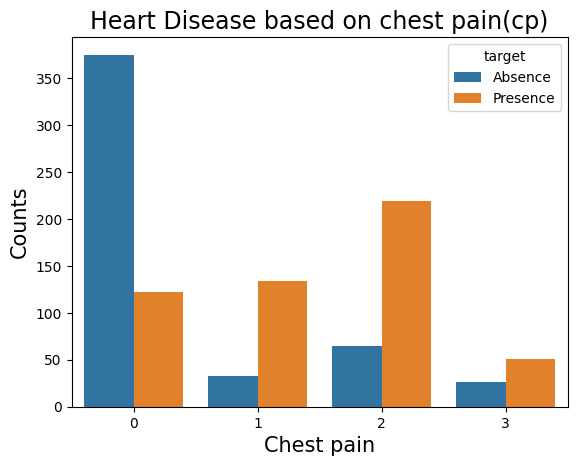

In [ ]:
#Count Plot Creation of Chest Pain Experienced using MatplotLib and Seaborn

sns.countplot(x=new_Data['cp'], hue='target', data=new_Data)
plt.title('Heart Disease based on chest pain(cp)', fontsize=17)
plt.xlabel('Chest pain',fontsize=15)
plt.ylabel('Counts',fontsize=15)
plt.show()

It seems people having type-2 chest pain have a higher chance of heart disease.


#**Analysing the distribution of thalach(maximum heart rate achieved)**

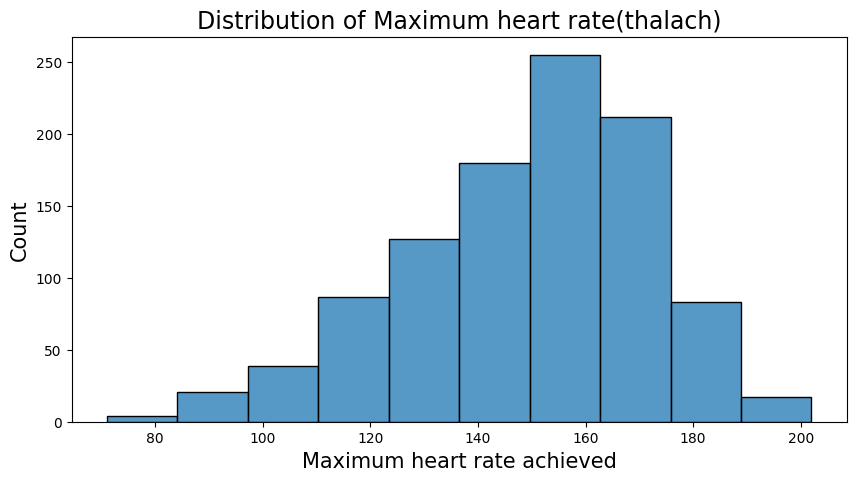

In [ ]:
#Countplot Creation of Distribution of thalach using MatplotLib and Seaborn

plt.figure(figsize=(10,5))
sns.histplot(new_Data['thalach'], bins=10)
plt.title('Distribution of Maximum heart rate(thalach)', fontsize=17)
plt.xlabel('Maximum heart rate achieved', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

Almost 63% of patients have maximum heart rate between 130-170 and the average heart rate is 149.11/min.

#**Maximum heart rate achieved by Gender**

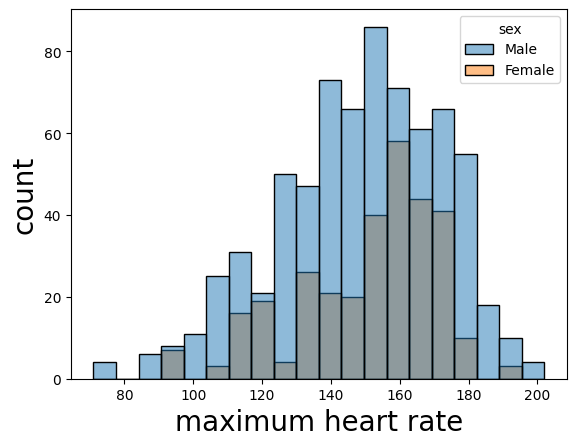

In [ ]:
sns.histplot(x=new_Data["thalach"],hue=new_Data["sex"]) # it give frequency hue =value counts
plt.xlabel('maximum heart rate',fontsize=20)  # assigning name to x-axis and font size is 20
plt.ylabel('count',fontsize=20)# assigning name to y-axis and font size is 20
plt.show()

Since, we can say that males are achieved maximum heart rate. Females are having very less amount. Which you can see in this histplot.

#**Distribuition by Resting Blood Pressure(trestbps)**

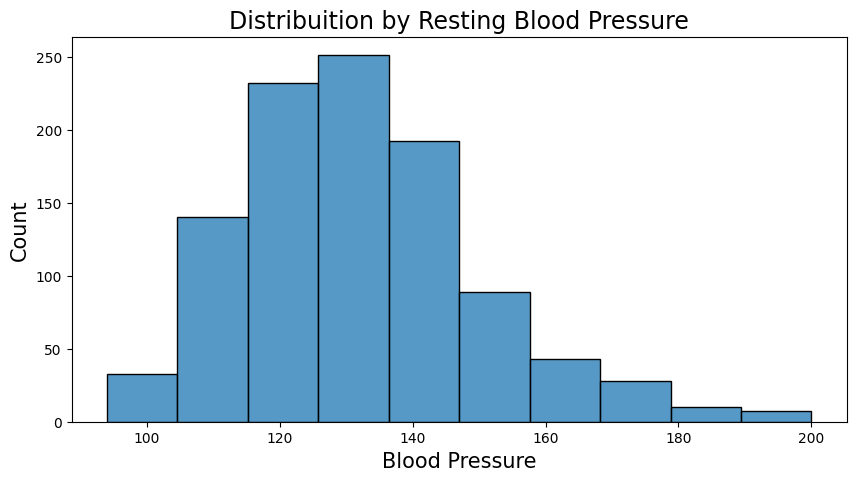

In [ ]:
#Histplot Creation of Distribution of trestbps(Resting Blood Pressure) using MatplotLib and Seaborn

plt.figure(figsize=(10,5))
sns.histplot(x='trestbps',bins=10, data=new_Data)
plt.title('Distribuition by Resting Blood Pressure', fontsize=17)
plt.xlabel('Blood Pressure', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

##**Heart Disease Based on Blood Pressure:**

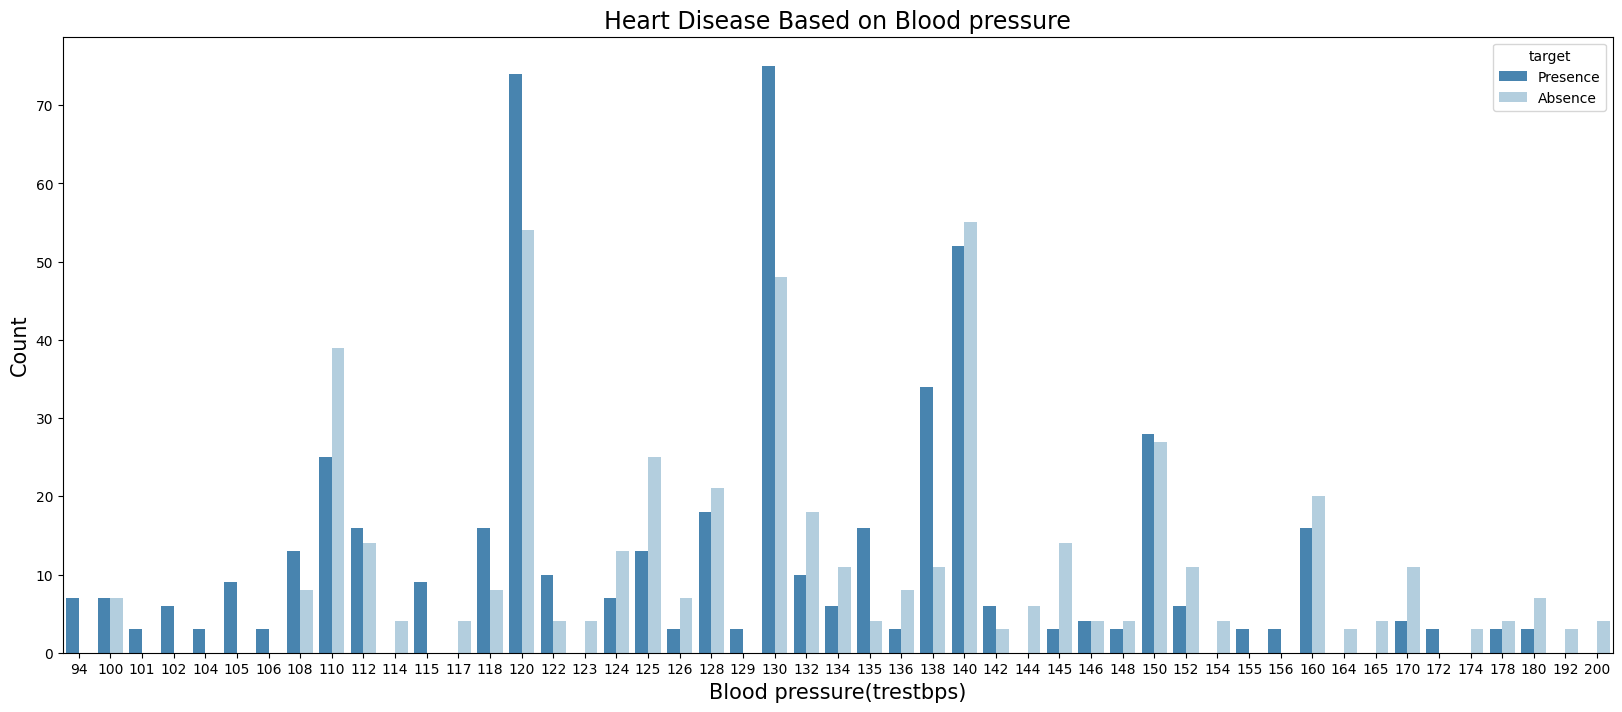

In [ ]:
plt.figure(figsize=(20,8))
sns.countplot(x=new_Data["trestbps"], hue=new_Data["target"], data=new_Data, palette='Blues_r')
plt.xlabel('Blood pressure(trestbps)', fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.title('Heart Disease Based on Blood pressure',fontsize=17)
plt.show()

The blood pressure range between 110 to 150 is more chance of heart disease.
If resting blood pressure is low then the chance of heart disease is slightly less

#**Distribuition of Blood Pressure based on Gender**

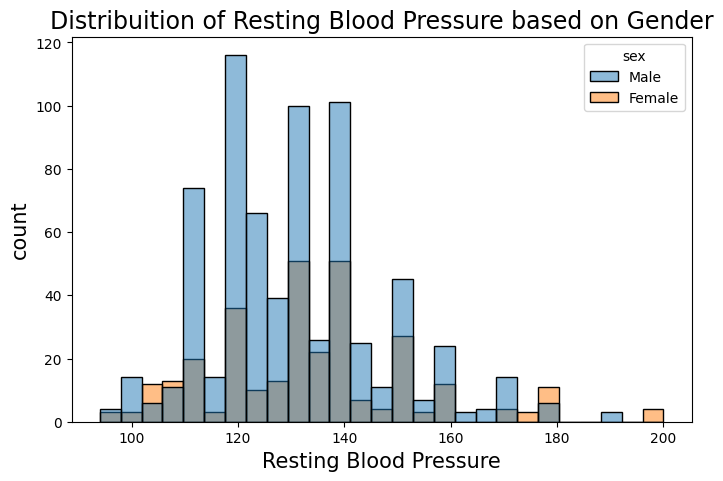

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(x=new_Data["trestbps"],hue=new_Data["sex"]) # it give frequency hue =value counts
plt.title('Distribuition of Resting Blood Pressure based on Gender', fontsize=17)
plt.xlabel('Resting Blood Pressure',fontsize=15)  # assigning name to x-axis and font size is 15
plt.ylabel('count',fontsize=15)# assigning name to y-axis and font size is 15
plt.show()

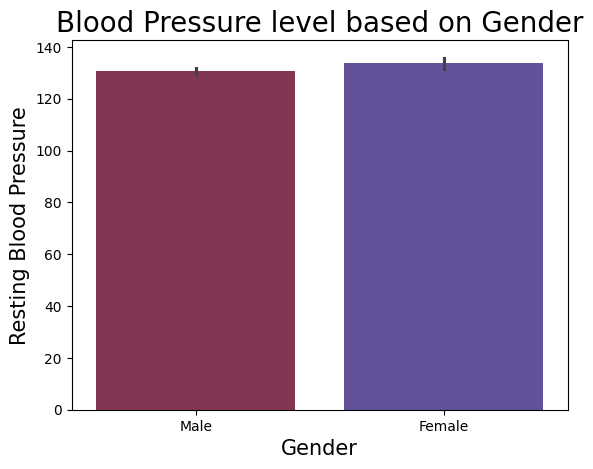

In [ ]:
#Bar Plot Creation of Person's Resting Blood Pressure using MatplotLib and Seaborn

sns.barplot(x='sex', y='trestbps',hue='sex',legend=False, data=new_Data, palette='twilight_r')
plt.title("Blood Pressure level based on Gender", fontsize=20)
plt.xlabel('Gender',fontsize=15)
plt.ylabel("Resting Blood Pressure", fontsize=15)
plt.show()

 Resting Blood Pressure is almost equal in Males and Females.

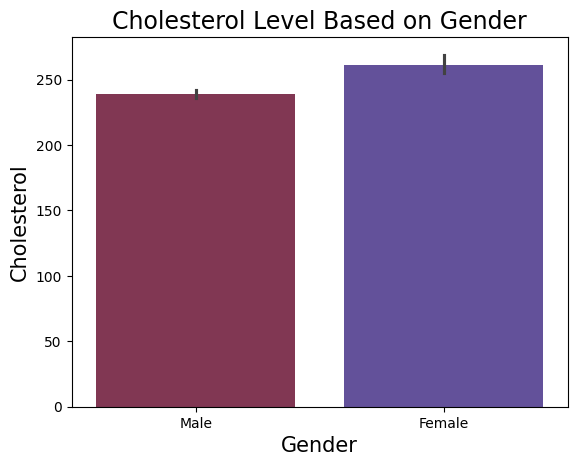

In [ ]:
#Bar Plot Creation of Cholesterol Level Based On Gender using MatplotLib and Seaborn

sns.barplot(x='sex', y='chol',hue='sex',legend=False, data=new_Data, palette='twilight_r')
plt.title("Cholesterol Level Based on Gender", fontsize=17)
plt.xlabel('Gender',fontsize=15)
plt.ylabel("Cholesterol", fontsize=15)
plt.show()

Females have little bit of higher cholesterol than Males.

A total cholesterol level of less than 200 mg/dl is normal. A total cholesterol level of 200 to 239 mg/dL is borderline high. A total cholesterol level of 240 mg/dL or greater is high.

#**Heart Disease based on cholesterol**

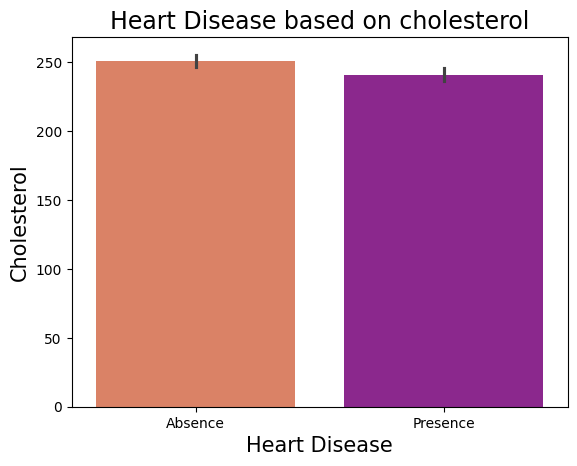

In [ ]:
#Bar Plot Heart Disease based on cholesterol using MatplotLib and Seaborn

sns.barplot(x='target', y='chol',hue='target',legend=False, data=new_Data, palette='plasma_r')
plt.title("Heart Disease based on cholesterol", fontsize=17)
plt.xlabel('Heart Disease',fontsize=15)
plt.ylabel("Cholesterol", fontsize=15)
plt.show()

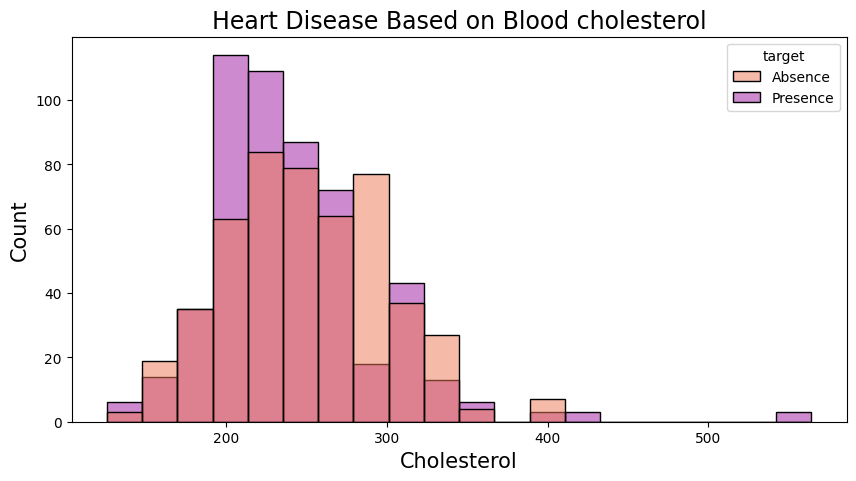

In [ ]:
#Creating histogram plot for better result of Heart Disease based on cholesterol

plt.figure(figsize=(10,5))
sns.histplot(x=new_Data["chol"],bins=20, hue=new_Data["target"], data=new_Data, palette='plasma_r')
plt.xlabel('Cholesterol', fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.title('Heart Disease Based on Blood cholesterol',fontsize=17)
plt.show()

Cholesterol between 200-300 which is indicate that the high chance of heart disease.

#**Cholesterol based on Age**

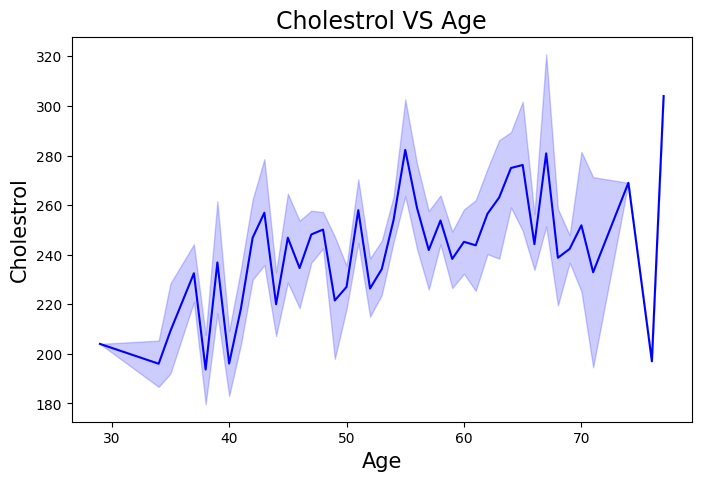

In [ ]:
#Line Plot Creation of Cholestrol VS Age using MatplotLib and Seaborn
plt.figure(figsize=(8,5))
sns.lineplot(x='age', y='chol', data=new_Data, color='b')
plt.title('Cholestrol VS Age', fontsize=17)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Cholestrol', fontsize=15)
plt.show()

Similarly Cholesterol increasing in the age group of 35-65.

#**Analysing the ST Depression(oldpeak):**

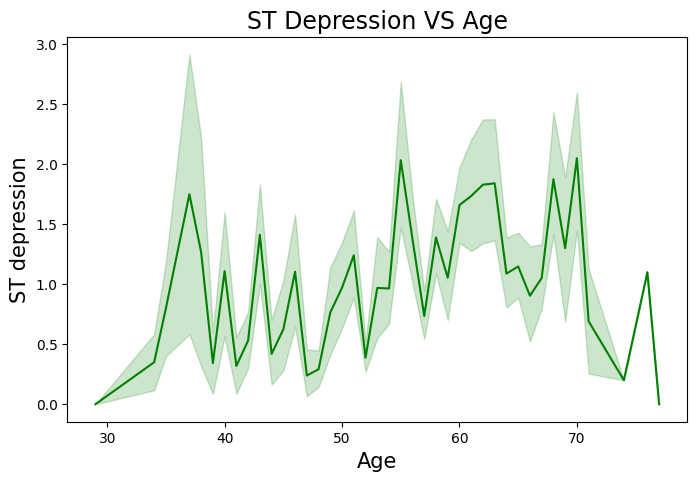

In [ ]:
#Line Plot Creation of ST Depression(oldpeak) VS Age using MatplotLib and Seaborn

plt.figure(figsize=(8,5))
sns.lineplot(x='age', y='oldpeak', data=new_Data, color='g')
plt.title('ST Depression VS Age', fontsize=17)
plt.xlabel('Age', fontsize=15)
plt.ylabel('ST depression', fontsize=15)
plt.show()

We can observe from here that ST depression mostly increases between the age group of 30-40.

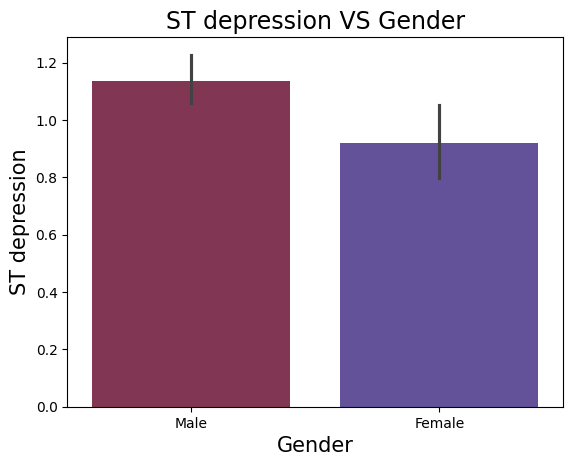

In [ ]:
#Bar Plot Creation of ST depression(oldpeak) VS Gender using MatplotLib and Seaborn

sns.barplot(x='sex', y='oldpeak', hue='sex', legend=False, data=new_Data, palette='twilight_r')
plt.title('ST depression VS Gender', fontsize=17)
plt.xlabel('Gender', fontsize=15)
plt.ylabel('ST depression', fontsize=15)
plt.show()

More Males are prone to ST depression as compare to females.

#**Analysing the fbs(fasting blood sugar) feature:**

In [ ]:
new_Data['fbs'].unique()

array([0, 1])

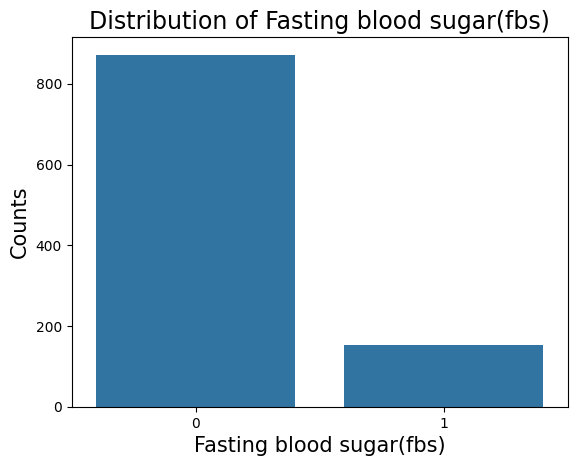

In [ ]:
#Count Plot Creation of fbs distribution using MatplotLib and Seaborn

sns.countplot(x=new_Data['fbs'], data=new_Data)
plt.title('Distribution of Fasting blood sugar(fbs)', fontsize=17)
plt.xlabel('Fasting blood sugar(fbs)',fontsize=15)
plt.ylabel('Counts',fontsize=15)
plt.show()

Almost 85% of patients do not have Fasting Blood Sugar.

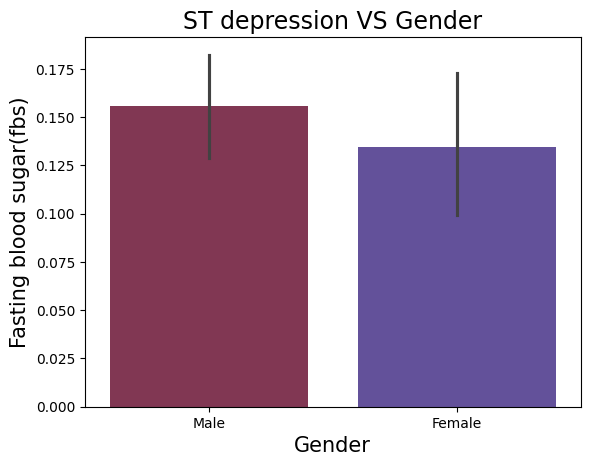

In [ ]:
#Bar Plot Creation of Fasting blood sugar(fbs) VS Gender using MatplotLib and Seaborn

sns.barplot(x='sex', y='fbs', hue='sex', legend=False, data=new_Data, palette='twilight_r')
plt.title('ST depression VS Gender', fontsize=17)
plt.xlabel('Gender', fontsize=15)
plt.ylabel('Fasting blood sugar(fbs)', fontsize=15)
plt.show()

So, We can see Males have high no of Fasting Blood Sugar over 120.

#**Analysing the exang(exercise induced angina) feature:**

In [ ]:
new_Data['exang'].unique()

array([0, 1])

0: no, 1: yes

If you suffer from Angina, you may be concerned that exercise will make your symptoms worse.

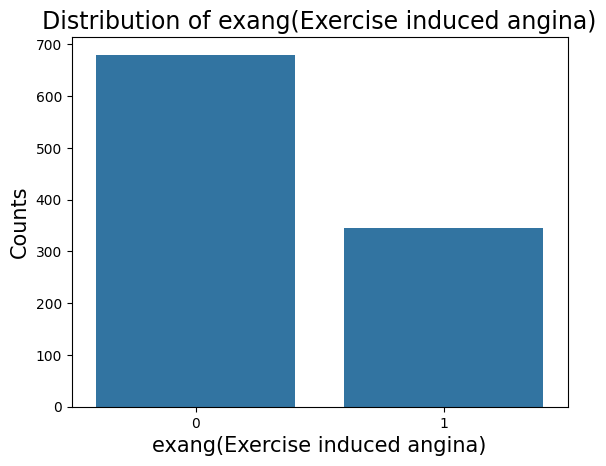

In [ ]:
#Count Plot Creation of exang(Exercise induced angina) distribution using MatplotLib and Seaborn

sns.countplot(x=new_Data['exang'], data=new_Data)
plt.title('Distribution of exang(Exercise induced angina)', fontsize=17)
plt.xlabel('exang(Exercise induced angina)',fontsize=15)
plt.ylabel('Counts',fontsize=15)
plt.show()

Maximum number of patient is in type '0' means they not doing exercise.

##**Exercise induced angina(exang) vs Gender**

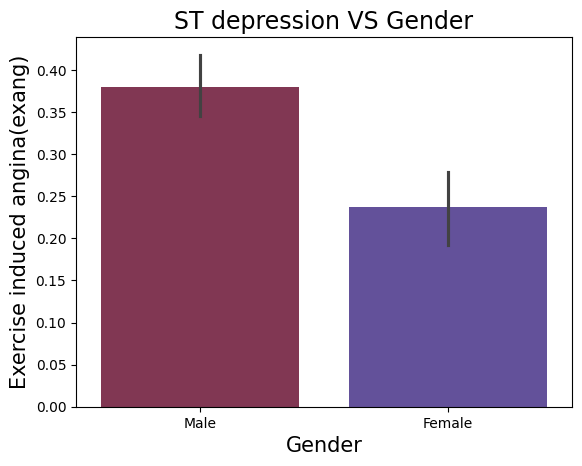

In [ ]:
#Bar Plot Creation of Fasting blood sugar(fbs) VS Gender using MatplotLib and Seaborn

sns.barplot(x='sex', y='exang', hue='sex', legend=False, data=new_Data, palette='twilight_r')
plt.title('ST depression VS Gender', fontsize=17)
plt.xlabel('Gender', fontsize=15)
plt.ylabel('Exercise induced angina(exang)', fontsize=15)
plt.show()

##**Exercise induced angina(exang) vs Heart Disease:**

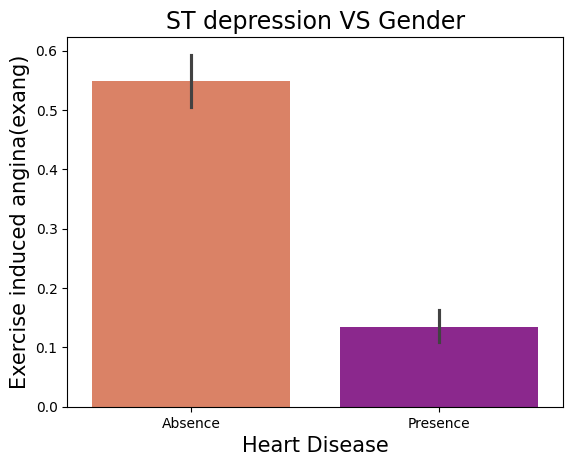

In [ ]:
#Bar Plot Creation of Exercise induced angina VS Heart Disease using MatplotLib and Seaborn

sns.barplot(x='target', y='exang', hue='target', legend=False, data=new_Data, palette='plasma_r')
plt.title('ST depression VS Gender', fontsize=17)
plt.xlabel('Heart Disease', fontsize=15)
plt.ylabel('Exercise induced angina(exang)', fontsize=15)
plt.show()

People with exang=1 i.e. Exercise induced angina are much less likely to have heart problem. And those in exang=0, they are having absence of heart disease.

#**Heart Disease based on slope:**

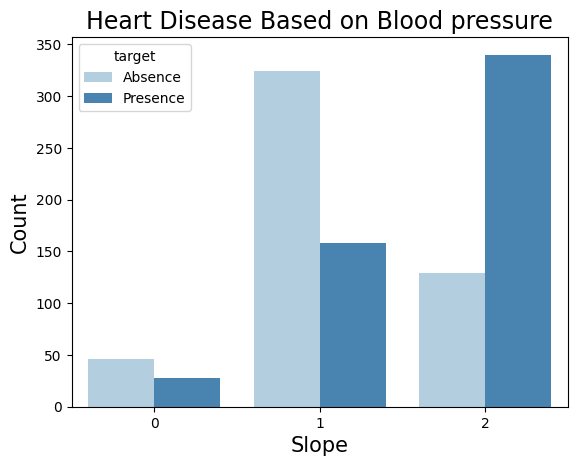

In [ ]:
#plt.figure(figsize=(20,8))
sns.countplot(x=new_Data["slope"], hue=new_Data["target"], data=new_Data, palette='Blues')
plt.xlabel('Slope', fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.title('Heart Disease Based on slope',fontsize=17)
plt.show()

Slope: The slope of the peak exercise ST segment.

We observe that Slope '2' causes heart disease much more than Slope '0' and '1'.

#**Analysing Heart Disease based on cholesterol and restecg(Resting electrocardiographic results):**

In [ ]:
new_Data['restecg'].unique()

array([1, 0, 2])

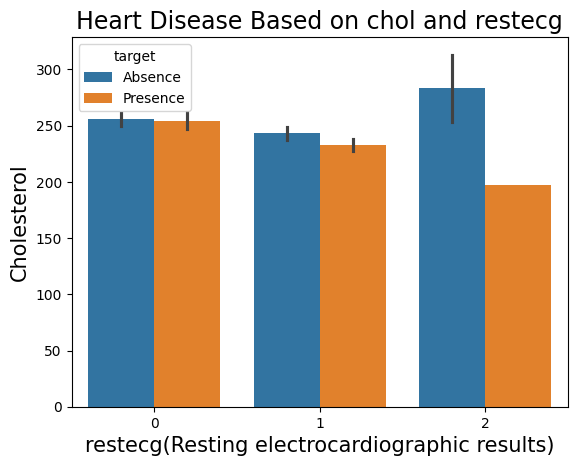

In [ ]:
# Barplot creation showing the relation between restecg result and serum cholesterol with respect to target veriable(HEART DISEASE)

sns.barplot(x='restecg',y='chol',hue=new_Data.target,data=new_Data)
plt.xlabel('restecg(Resting electrocardiographic results)', fontsize=15)
plt.ylabel('Cholesterol',fontsize=15)
plt.title('Heart Disease Based on chol and restecg',fontsize=17)
plt.show()

**RELATION BETWEEN EKG RESULT AND SERUM CHOLESTEROL WITH RESPECT TO TARGET VERIABLE(HEART DISEASE)**


1.   In the 2-ecg result with serum cholesterol showing the less chance of heart disease.
2.   The ecg result is 0 and 1 with all serum cholesterol the chance of heart disease is equal.



#**Correlation of the data:**

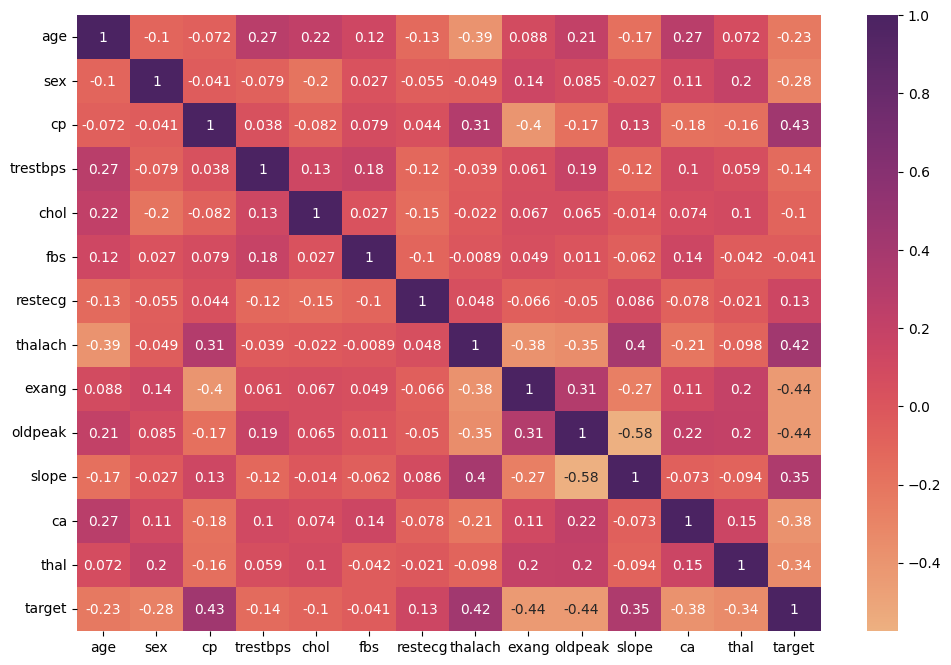

In [ ]:
#Showing correlation between data attributes using heatmap.

plt.figure(figsize=(12,8))
sns.heatmap(Data.corr(), square=False, cmap='flare', annot=True)
plt.show()